In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt 

In [5]:
BATCH_SIZE = 16

print("\nLoading training data...")

training_data_generator = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05)


Loading training data...

Loading validation data...


In [4]:
training_iterator = training_data_generator.flow_from_directory('chest_xray/train',class_mode='categorical',color_mode='grayscale',batch_size=BATCH_SIZE)

Found 5216 images belonging to 2 classes.


In [7]:
validation_data_generator = ImageDataGenerator(rescale=1./255)

validation_iterator = validation_data_generator.flow_from_directory('chest_xray/test',class_mode='categorical',color_mode='grayscale',batch_size=BATCH_SIZE)

print("\nBuilding model...")

Found 624 images belonging to 2 classes.

Building model...


In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))
model.add(tf.keras.layers.Conv2D(2, 5, strides=3, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(5, 5), strides=(5,5)))
model.add(tf.keras.layers.Conv2D(4, 3, strides=1, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2,activation="softmax"))

model.summary()

print("\nCompiling model...")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 84, 84, 2)         52        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 2)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 4)         76        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 4)          0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 196)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [13]:
model.compile(
   optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.005),
   loss=tf.keras.losses.CategoricalCrossentropy(),
   metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]
)

print("\nTraining model...")


Training model...


In [24]:
history = model.fit(
       training_iterator,
       steps_per_epoch=training_iterator.samples/BATCH_SIZE,
       epochs=5,
       validation_data=validation_iterator,
       validation_steps=validation_iterator.samples/BATCH_SIZE)

Epoch 1/5
  1/326 [..............................] - ETA: 27s - loss: 0.0568 - categorical_accuracy: 1.0000 - auc_1: 1.0000

2023-11-19 20:07:01.245880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


326/326 [==============================] - ETA: 0s - loss: 0.1921 - categorical_accuracy: 0.9254 - auc_1: 0.9771

2023-11-19 20:07:29.101653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


326/326 [==============================] - 30s 91ms/step - loss: 0.1921 - categorical_accuracy: 0.9254 - auc_1: 0.9771 - val_loss: 0.3152 - val_categorical_accuracy: 0.8702 - val_auc_1: 0.9407
Epoch 2/5
326/326 [==============================] - 30s 93ms/step - loss: 0.1814 - categorical_accuracy: 0.9293 - auc_1: 0.9794 - val_loss: 0.3662 - val_categorical_accuracy: 0.8654 - val_auc_1: 0.9290
Epoch 3/5
326/326 [==============================] - 31s 94ms/step - loss: 0.1802 - categorical_accuracy: 0.9319 - auc_1: 0.9795 - val_loss: 0.3285 - val_categorical_accuracy: 0.8734 - val_auc_1: 0.9425
Epoch 4/5
326/326 [==============================] - 31s 95ms/step - loss: 0.1825 - categorical_accuracy: 0.9325 - auc_1: 0.9786 - val_loss: 0.3208 - val_categorical_accuracy: 0.8766 - val_auc_1: 0.9394
Epoch 5/5
326/326 [==============================] - 31s 95ms/step - loss: 0.1745 - categorical_accuracy: 0.9327 - auc_1: 0.9807 - val_loss: 0.3446 - val_categorical_accuracy: 0.8830 - val_auc_1: 0.

In [25]:
test_accu = model.evaluate_generator(validation_iterator,steps=624)

print('The testing accuracy is :',test_accu[1]*100, '%')

/var/folders/xw/ch1pdcb97pdgds09_m3mxljr0000gn/T/ipykernel_69425/1340252488.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_accu = model.evaluate_generator(validation_iterator,steps=624)
2023-11-19 20:09:43.552432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


The testing accuracy is : 88.30128312110901 %


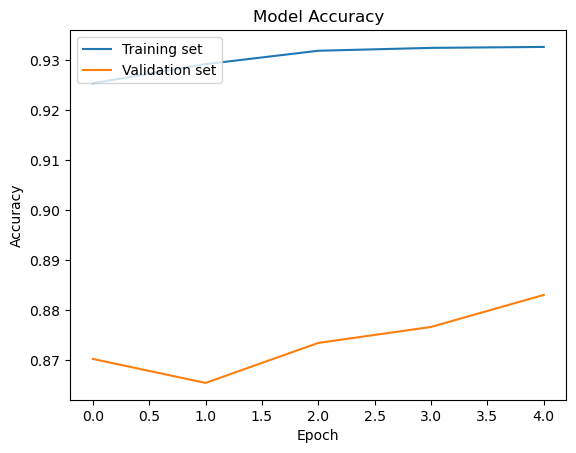

In [29]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

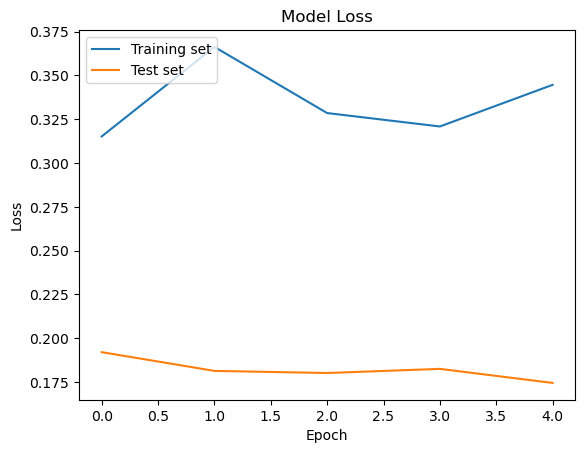

In [31]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()